In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import math
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

%matplotlib inline

In [ ]:
df = pd.read_csv('commodity_futures.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
5864,2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
5865,2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25
5866,2022-09-22,7.089,1671.4,83.49,90.46,1457.00,688.25,3.4985,19.548,1006.25,...,3123.75,341.15,24502.0,910.75,18.49,251.57,223.55,94.125,979.50,96.83


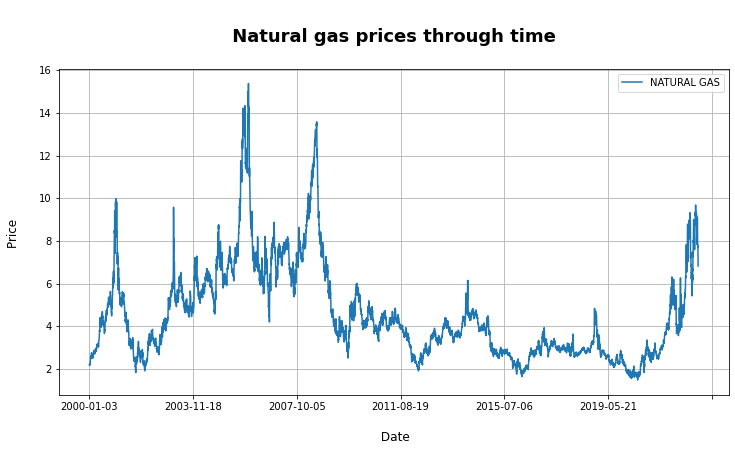

In [ ]:
df.plot(x='Date', y='NATURAL GAS', kind='line', figsize=(12,6), grid=True)
plt.title('\n Natural gas prices through time \n', fontsize=18, fontweight='bold')
plt.xlabel('\n Date', fontsize=12)
plt.ylabel('Price \n', fontsize=12)
plt.show()


In [ ]:
df.set_index('Date', inplace=True)
df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,145.725,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,146.300,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,145.875,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25


In [ ]:
data = df[['NATURAL GAS']]
data.isna().sum()

NATURAL GAS    1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
print('\n------- DATAFRAME -------\n\n', data)
print('\n\n------- ABOUT DATA ------- \n\n', data.describe())


------- DATAFRAME -------

             NATURAL GAS
Date                   
2000-01-04        2.176
2000-01-05        2.168
2000-01-06        2.196
2000-01-07        2.173
2000-01-10        2.216
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[5867 rows x 1 columns]


------- ABOUT DATA ------- 

        NATURAL GAS
count  5867.000000
mean      4.544450
std       2.243106
min       1.482000
25%       2.870000
50%       3.925000
75%       5.676000
max      15.378000


In [ ]:
data = data.iloc[5137:]
data

,NATURAL GAS
Date,
2019-11-29,2.281
2019-12-02,2.329
2019-12-03,2.441
2019-12-04,2.399
2019-12-05,2.427
...,...
2022-09-19,7.752
2022-09-20,7.717
2022-09-21,7.779


In [ ]:
print('\n------- DATAFRAME -------\n\n', data)
print('\n\n------- ABOUT DATA ------- \n\n', data.describe(include ='all'))


------- DATAFRAME -------

             NATURAL GAS
Date                   
2019-11-29        2.281
2019-12-02        2.329
2019-12-03        2.441
2019-12-04        2.399
2019-12-05        2.427
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[730 rows x 1 columns]


------- ABOUT DATA ------- 

        NATURAL GAS
count   730.000000
mean      3.880682
std       2.113355
min       1.482000
25%       2.298250
50%       2.974500
75%       4.983500
max       9.680000


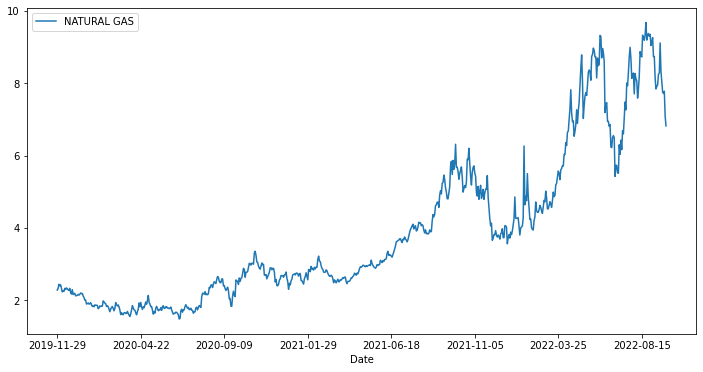

In [ ]:
data[:5502].plot(figsize=(12,6)) 

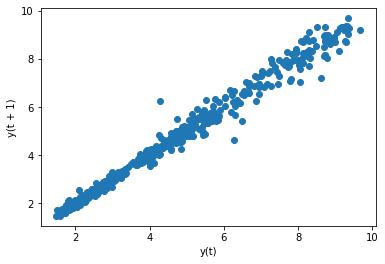

In [ ]:
lag_plot(data)
plt.show()

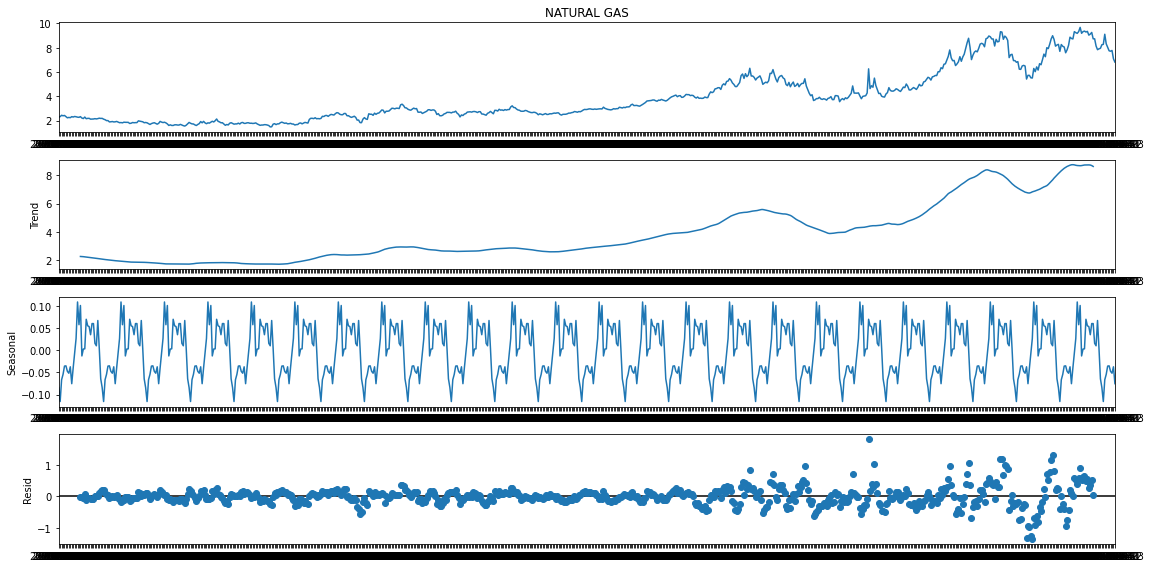

In [ ]:
sd = seasonal_decompose(data['NATURAL GAS'],  period = 30)

fig =sd.plot()
fig.set_size_inches((16,8))
fig.tight_layout()
plt.show()

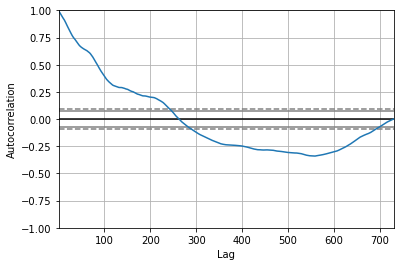

In [ ]:
autocorrelation_plot(data) #correlaton of the whole dataset
plt.show()

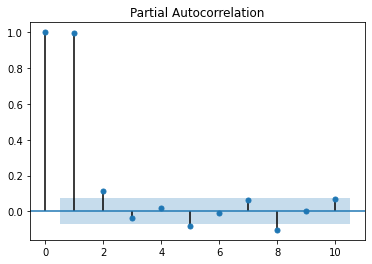

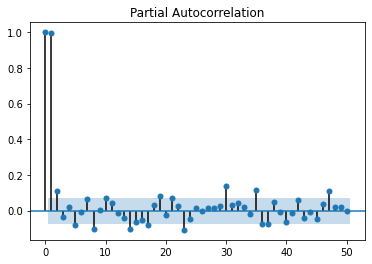

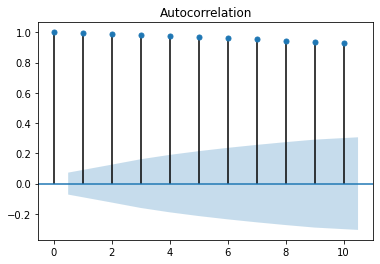

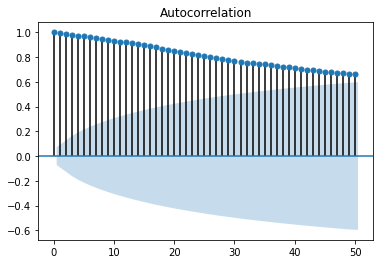

In [ ]:
pacf = plot_pacf(data['NATURAL GAS'], lags=10)
pacf2 = plot_pacf(data['NATURAL GAS'], lags=50)
acf = plot_acf(data['NATURAL GAS'], lags=10)
acf2 = plot_acf(data['NATURAL GAS'], lags=50)

In [ ]:
data_test = adfuller(data['NATURAL GAS'], autolag = 'AIC')

print("1. ADF : ", data_test[0])
print("2. P-Value : ", data_test[1])
print("3. Number of Lags : ", data_test[2])
print("4. Number of observations used for ADF regression and critical values calculation :", data_test[3])
print("5. Critical Values :")


for key, val in data_test[4].items():
  print("\t",key, ":", val)


if (data_test[1] < 0.05) and (data_test[0] < data_test[4]['5%']):
        print(' \n\n The H0 hypothesis was rejected. The series is stationary')
else:
        print(' \n\n Failed to reject the H0 hypothesis. The series is NOT stationary')

1. ADF :  -0.7963233326992363
2. P-Value :  0.8201996758095383
3. Number of Lags :  6
4. Number of observations used for ADF regression and critical values calculation : 723
5. Critical Values :
	 1% : -3.4394269973845657
	 5% : -2.8655458544300387
	 10% : -2.568903174551249
 

 Failed to reject the H0 hypothesis. The series is NOT stationary


In [ ]:
datadiff= pd.DataFrame() 
datadiff['First Difference'] = data['NATURAL GAS'] - data['NATURAL GAS'].shift(1)

In [ ]:
datadiff = datadiff.dropna()

In [ ]:
datadiff ['Seasonal Difference'] = data['NATURAL GAS']-data['NATURAL GAS'].shift(30)

In [ ]:
datadiff = datadiff.dropna()

In [ ]:
datadiff.head(20)

,First Difference,Seasonal Difference
Date,,
2020-01-14,0.005,-0.094
2020-01-15,-0.067,-0.209
2020-01-16,-0.043,-0.364
2020-01-17,-0.074,-0.396
2020-01-20,0.000,-0.424
2020-01-21,-0.108,-0.439
2020-01-22,0.010,-0.327
2020-01-23,0.021,-0.338
2020-01-24,-0.033,-0.350


In [ ]:
print('\n------------------- DATAFRAME --------------------\n\n', datadiff)
print('\n\n----------------- ABOUT DATA ----------------- \n\n', datadiff.describe(include ='all'))
print('\n\n\n')


------------------- DATAFRAME --------------------

             First Difference  Seasonal Difference
Date                                             
2020-01-14             0.005               -0.094
2020-01-15            -0.067               -0.209
2020-01-16            -0.043               -0.364
2020-01-17            -0.074               -0.396
2020-01-20             0.000               -0.424
...                      ...                  ...
2022-09-19            -0.277                0.163
2022-09-20            -0.035               -0.116
2022-09-21             0.062               -0.423
2022-09-22            -0.690               -1.785
2022-09-23            -0.268               -1.947

[700 rows x 2 columns]


----------------- ABOUT DATA ----------------- 

        First Difference  Seasonal Difference
count        700.000000           700.000000
mean           0.006627             0.272003
std            0.232942             0.992073
min           -1.626000            -3.46

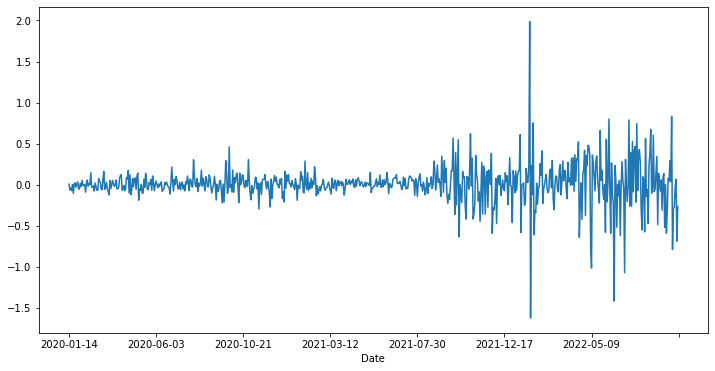

In [ ]:
datadiff['First Difference'].plot(figsize=(12,6)) 

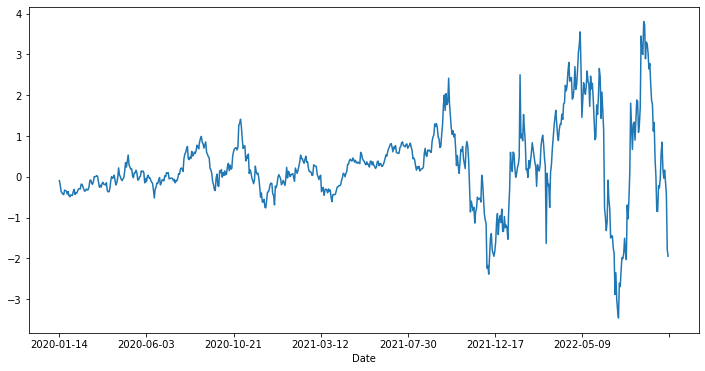

In [ ]:
datadiff['Seasonal Difference'].plot(figsize=(12,6)) 


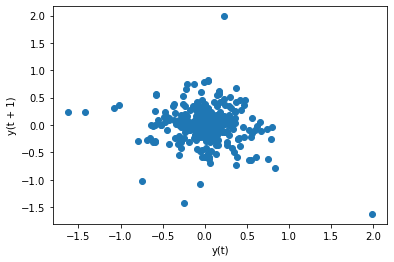

In [ ]:
lag_plot(datadiff['First Difference'])
plt.show()

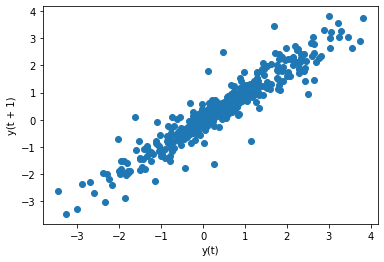

In [ ]:
lag_plot(datadiff['Seasonal Difference'])
plt.show()

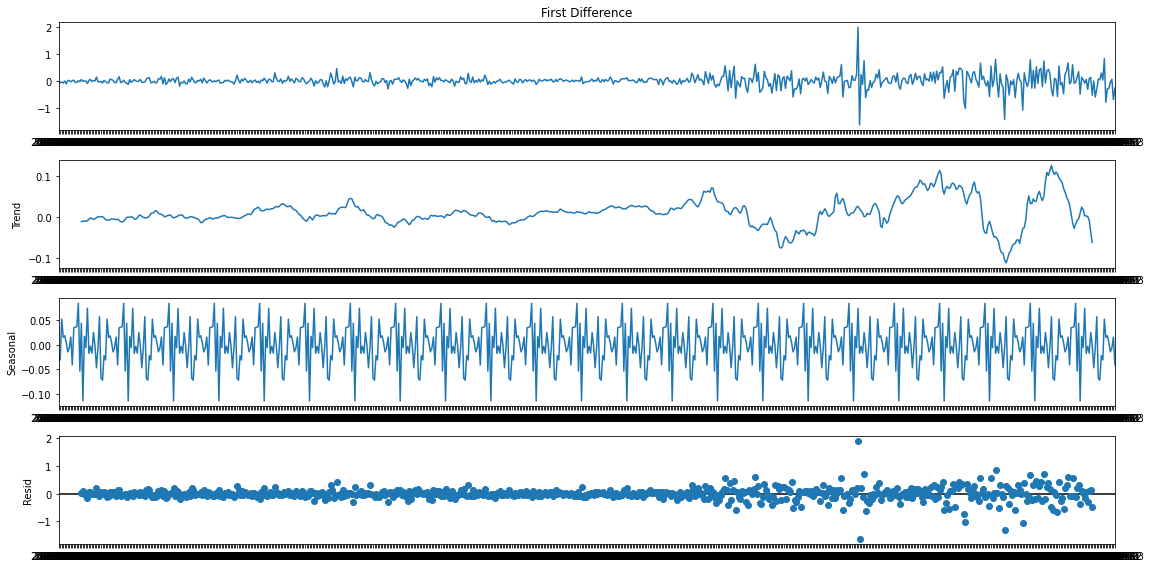

In [ ]:
sd = seasonal_decompose(datadiff['First Difference'], period = 30)

fig =sd.plot()
fig.set_size_inches((16,8))
fig.tight_layout()
plt.show()

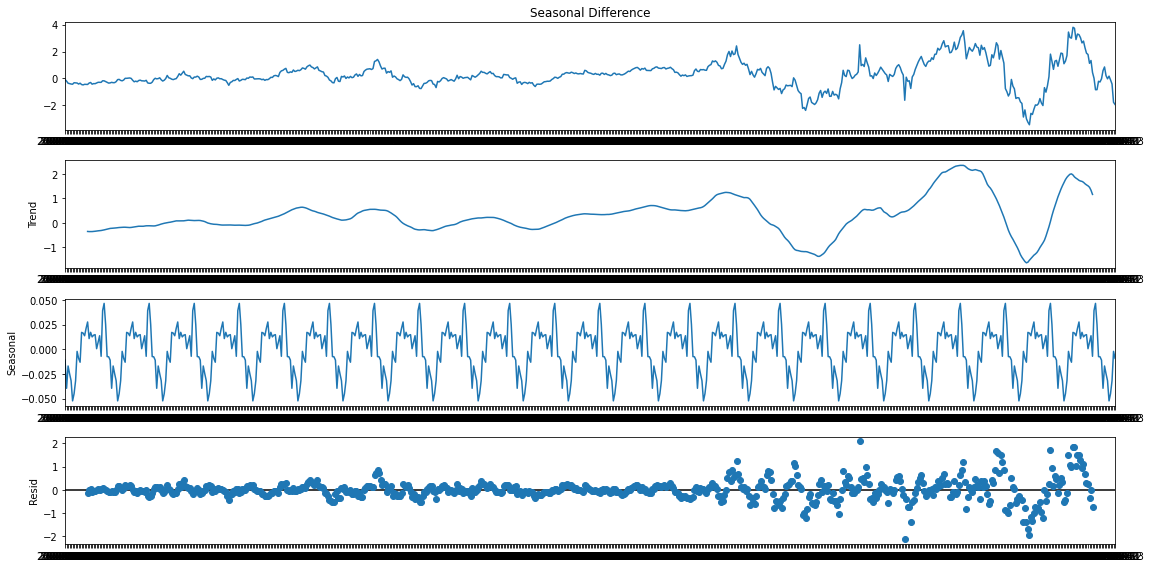

In [ ]:
sd = seasonal_decompose(datadiff['Seasonal Difference'], period = 30)

fig =sd.plot()
fig.set_size_inches((16,8))
fig.tight_layout()
plt.show()

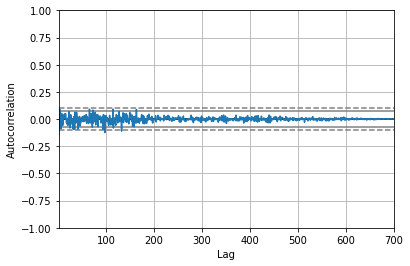

In [ ]:
autocorrelation_plot(datadiff['First Difference'])
plt.show()

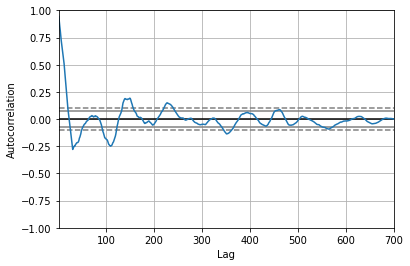

In [ ]:
autocorrelation_plot(datadiff['Seasonal Difference'])
plt.show()

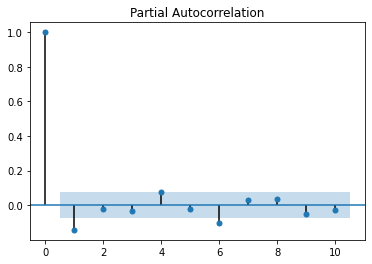

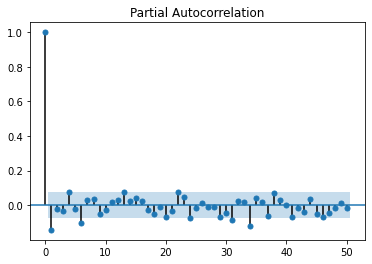

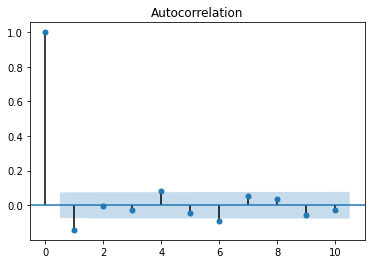

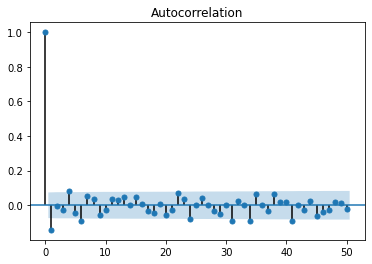

In [ ]:
pacf = plot_pacf(datadiff['First Difference'], lags=10)
pacf2 = plot_pacf(datadiff['First Difference'], lags=50)
acf = plot_acf(datadiff['First Difference'], lags=10)
acf2 = plot_acf(datadiff['First Difference'], lags=50)

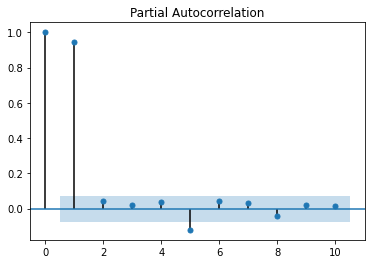

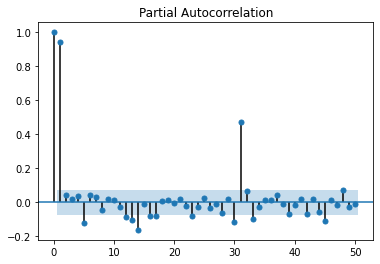

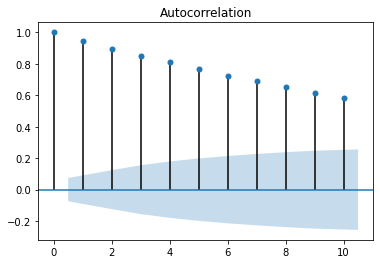

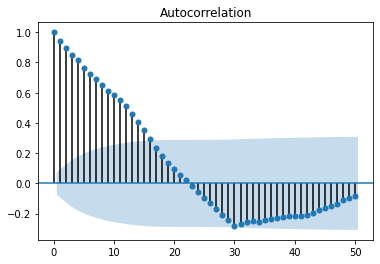

In [ ]:
pacf = plot_pacf(datadiff['Seasonal Difference'], lags=10)
pacf2 = plot_pacf(datadiff['Seasonal Difference'], lags=50)
acf = plot_acf(datadiff['Seasonal Difference'], lags=10)
acf2 = plot_acf(datadiff['Seasonal Difference'], lags=50)

In [ ]:
data_test3 = adfuller(datadiff['First Difference'], autolag = 'AIC')


print("\n -----FIRST DIFFERENCE----- \n")
print("1. ADF : ", data_test3[0])
print("2. P-Value : ", data_test3[1])
print("3. Number of Lags : ", data_test3[2])
print("4. Number of observations used for ADF regression and critical values calculation :", data_test3[3])
print("5. Critical Values :")


for key, val in data_test3[4].items():
  print("\t",key, ":", val)


if (data_test3[1] < 0.05) and (data_test3[0] < data_test3[4]['5%']):
        print(' \n\n The H0 hypothesis was rejected. The series is stationary.')
else:
        print(' \n\n Failed to reject the H0 hypothesis. The series is NOT stationary.')


data_test4 = adfuller(datadiff['Seasonal Difference'], autolag = 'AIC')


print("\n ----- SEASONAL DIFFERENCE----- \n")
print("1. ADF : ", data_test4[0])
print("2. P-Value : ", data_test4[1])
print("3. Number of Lags : ", data_test4[2])
print("4. Number of observations used for ADF regression and critical values calculation :", data_test4[3])
print("5. Critical Values :")


for key, val in data_test4[4].items():
  print("\t",key, ":", val)


if (data_test4[1] < 0.05) and (data_test4[0] < data_test4[4]['5%']):
        print(' \n\n The H0 hypothesis was rejected. The series is stationary.')
else:
        print(' \n\n Failed to reject the H0 hypothesis. The series is NOT stationary.')


 -----FIRST DIFFERENCE----- 

1. ADF :  -11.83802415049931
2. P-Value :  7.707547020304058e-22
3. Number of Lags :  5
4. Number of observations used for ADF regression and critical values calculation : 694
5. Critical Values :
	 1% : -3.4398077121659765
	 5% : -2.865713608066101
	 10% : -2.5689925469026402
 

 The H0 hypothesis was rejected. The series is stationary.

 ----- SEASONAL DIFFERENCE----- 

1. ADF :  -5.94296531207002
2. P-Value :  2.2383189887868203e-07
3. Number of Lags :  16
4. Number of observations used for ADF regression and critical values calculation : 683
5. Critical Values :
	 1% : -3.439960610754265
	 5% : -2.8657809735786244
	 10% : -2.5690284373908066
 

 The H0 hypothesis was rejected. The series is stationary.


In [ ]:
values = data.values
train = values[:len(values) - 5]
test = values[len(values)-5:]

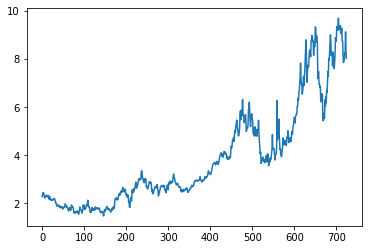

In [ ]:
plt.plot(train)

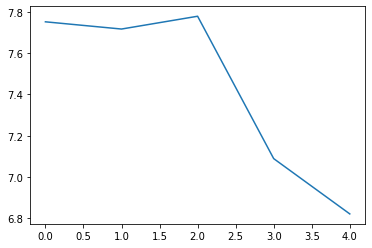

In [ ]:
plt.plot(test)

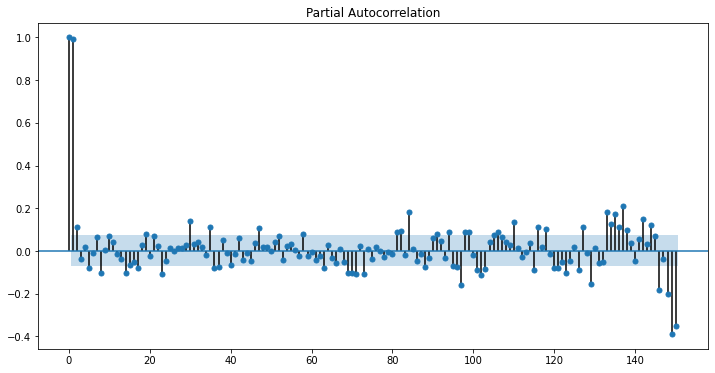

In [ ]:
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    plot_pacf(data['NATURAL GAS'], lags=150)

In [ ]:
order = ([4,6,17,23,31,34,38,46,65,69,83,93,94,96,97,109,117,125,132], 1, 
         [4,6,17,24,31,34,38,46,65,69,83,93,94,96,97,109,117,125,132])  #(p,d,q)
seasonal_order = (1, 0, 0, 24)    #(P,D,Q,s)
model=sm.tsa.statespace.SARIMAX(train,order=order,seasonal_order=seasonal_order)
model=model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                                                                                                   SARIMAX Results                                                                                                                   
Dep. Variable:                                                                                                                                                                                             y   No. Observations:                  725
Model:             SARIMAX([4, 6, 17, 23, 31, 34, 38, 46, 65, 69, 83, 93, 94, 96, 97, 109, 117, 125, 132], 1, [4, 6, 17, 24, 31, 34, 38, 46, 65, 69, 83, 93, 94, 96, 97, 109, 117, 125, 132])x(1, 0, [], 24)   Log Likelihood                 107.648
Date:                                                                                                                                                                                       Thu, 10 Nov 2022   AIC                           -135.296
Time:           

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions = model.predict(start,end,dynamic=True)

#print(predict)
for i in range(len(predictions)):
	print('predicted = %.3f --- expected = %.3f' % (predictions[i], test[i]))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('\n\nRMSE: %.3f' % rmse)

predicted = 7.769 --- expected = 7.752
predicted = 7.649 --- expected = 7.717
predicted = 7.755 --- expected = 7.779
predicted = 7.337 --- expected = 7.089
predicted = 7.318 --- expected = 6.821


RMSE: 0.251


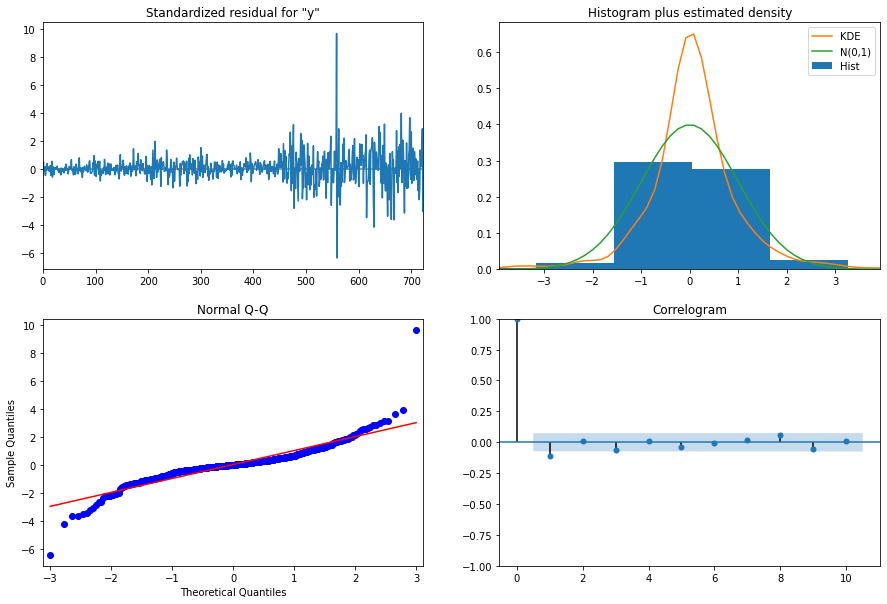

In [ ]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

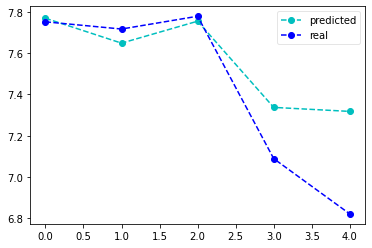

In [ ]:
plt.plot(predictions,'--o',color='c', label='predicted') 
plt.plot(test,'--o',color='b', label='real') 
leg= plt.legend(loc='best', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()